In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import numpy
import pandas
from PIL import Image
import random
import xarray as xr

In [2]:
Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Data/Output_Files_V6/'
Output_Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Github/RCP_Figs/Analysis_Figs_V6.3.2/'

In [3]:
# Open File
def Open_File(File):
    DF = pandas.read_csv(File)
    DF = DF.drop("Unnamed: 0", axis=1)
    return (DF)

In [4]:
# Open Each File
def Files_Open(Model, Diri, Subset):
    Data_DF = Open_File(Diri+Model+'_Data_'+Subset+'_Output_V6.csv')
    ET_DF = Open_File(Diri+Model+'_ET_'+Subset+'_Output_V6.csv')
    Codes_DF = Open_File(Diri+Model+'_Codes_Output_V6.csv')
# Edit Time Format
    Time, Begin_Time, Compl_Time, Trop_Peak_Time, Peak_Time, Birth_Time = [], [], [], [], [], []
    for i in range(len(Data_DF)):
        Time.append(Datetime(Data_DF["Time(Z)"][i]))
    for j in range(len(ET_DF)):
        Begin_Time.append(Datetime(ET_DF["ET Begin Time"][j]))
        Compl_Time.append(Datetime(ET_DF["ET Complete Time"][j]))
        Trop_Peak_Time.append(Datetime(ET_DF["Trop Peak Time"][j]))
        Peak_Time.append(Datetime(ET_DF["Peak Time"][j]))
        Birth_Time.append(Datetime(ET_DF["Genesis Time"][j]))
    Data_DF["Time(Z)"] = Time
    ET_DF["ET Begin Time"] = Begin_Time
    ET_DF["ET Complete Time"] = Compl_Time
    ET_DF["Trop Peak Time"] = Trop_Peak_Time
    ET_DF["Peak Time"] = Peak_Time
    ET_DF["Genesis Time"] = Birth_Time
    return (Data_DF, ET_DF, Codes_DF)

In [5]:
def Datetime(Time):
    try:
        New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
    except:
        New_Time = numpy.nan
    return (New_Time)

In [6]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)
Lat_Bins = Create_Bins(10,60,5)
Lon_Bins = Create_Bins(-100,20,5)

In [7]:
Num_Years = numpy.array([90,93,93])

In [8]:
# Function to Find Distance Between Two Points
def Find_Distance(y1, y2, x1, x2):
    Start_Lat = y1 * numpy.pi / 180
    End_Lat = y2 * numpy.pi / 180
    Start_Lon = x1 * numpy.pi / 180
    End_Lon = x2 * numpy.pi / 180
    Lat_Diff = End_Lat - Start_Lat
    Lon_Diff = End_Lon - Start_Lon
    Earth_Rad = 6378
    Distance = 2 * Earth_Rad * numpy.sqrt((numpy.sin(Lat_Diff/2))**2 + \
    numpy.cos(Start_Lat) * numpy.cos(End_Lat) * (numpy.sin(Lon_Diff/2))**2)
    return (Distance)

In [9]:
# Find a Specific Storm Within the DataFrame
def Find_Storm(DF, Code):
    DF_Storm = DF[DF["Code"] == Code].reset_index()
    return (DF_Storm)

In [10]:
Control_Data, Control_ET, Control_Codes = Files_Open("Control", Diri, "SubsetB")
RCP45_Data, RCP45_ET, RCP45_Codes = Files_Open("RCP45", Diri, "SubsetB")
RCP85_Data, RCP85_ET, RCP85_Codes = Files_Open("RCP85", Diri, "SubsetB")

In [11]:
# Calculate Storm Translation Velocity
def Find_Velocity(DF_Storm):
    Lon_Diff = numpy.zeros(len(DF_Storm))
    Lat_Diff = numpy.zeros(len(DF_Storm))
    for i in range(len(DF_Storm)):
        if i < len(DF_Storm)-1:
            Lon_Diff[i] = DF_Storm["Lon"][i+1] - DF_Storm["Lon"][i]
            Lat_Diff[i] = DF_Storm["Lat"][i+1] - DF_Storm["Lat"][i]
        else:
            Lon_Diff[i], Lat_Diff[i] = numpy.nan, numpy.nan
    DF_Storm["Lon Diff"] = Lon_Diff
    DF_Storm["Lat Diff"] = Lat_Diff
    return (DF_Storm)

In [12]:
DF_Storm = Find_Storm(RCP45_Data, "TC202006")
Find_Velocity(DF_Storm)

,index,Code,Name,Lon,Lat,SLP(hPa),Winds(m/s),B,VLT,VUT,Time(Z),Storm Phase,Lon Diff,Lat Diff
0,1407,TC202006,Grace,-32.43,17.00,1009.93,12.2,9.33,-55.76,16.23,2020-08-10 12:00:00,Tropical,-1.29,-0.30
1,1408,TC202006,Grace,-33.72,16.70,1007.71,14.4,14.15,-31.81,26.78,2020-08-10 18:00:00,Tropical,-0.57,0.34
2,1409,TC202006,Grace,-34.29,17.04,1008.61,19.4,13.84,-26.70,24.99,2020-08-11 00:00:00,Tropical,-1.74,0.88
3,1410,TC202006,Grace,-36.03,17.92,1008.40,20.1,13.02,-27.93,26.02,2020-08-11 06:00:00,Tropical,-1.97,0.79
4,1411,TC202006,Grace,-38.00,18.71,1010.18,18.2,13.23,-22.11,26.86,2020-08-11 12:00:00,Tropical,-2.21,0.70
5,1412,TC202006,Grace,-40.21,19.41,1010.17,18.6,11.88,-7.32,19.64,2020-08-11 18:00:00,Tropical,-2.49,0.36
6,1413,TC202006,Grace,-42.70,19.77,1011.00,20.0,9.48,18.66,17.68,2020-08-12 00:00:00,Tropical,-2.69,0.70
7,1414,TC202006,Grace,-45.39,20.47,1006.55,23.2,6.71,38.92,21.20,2020-08-12 06:00:00,Tropical,-2.42,0.36
8,1415,TC202006,Grace,-47.81,20.83,1005.31,29.6,2.61,69.92,33.62,2020-08-12 12:00:00,Tropical,-2.50,0.15
9,1416,TC202006,Grace,-50.31,20.98,1004.90,24.7,-1.18,99.88,40.22,2020-08-12 18:00:00,Tropical,-2.06,0.49


In [13]:
# Create New DF With Translation Velocity Info
def Velocity_DF(DF, Codes):
    for i in range(len(Codes)):
        DF_Storm = Find_Storm(DF, Codes["New Code"][i])
        DF_Storm = Find_Velocity(DF_Storm)
        if i == 0:
            DF_Velocity = DF_Storm.copy()
        else:
            DF_Velocity = pandas.concat([DF_Velocity, DF_Storm])
    DF_Velocity = DF_Velocity.reset_index().drop("index", axis=1).drop("level_0", axis=1)
    return (DF_Velocity)

In [14]:
Control_Velo = Velocity_DF(Control_Data, Control_Codes)

In [15]:
RCP45_Velo = Velocity_DF(RCP45_Data, RCP45_Codes)

In [16]:
RCP85_Velo = Velocity_DF(RCP85_Data, RCP85_Codes)

In [17]:
# Create DF of Each Latitude Range
def Lat_Range(Velo_DF, Min, Max):
    Range_DF = Velo_DF[(Velo_DF["Lat"] >= Min) & (Velo_DF["Lat"] < Max)]
    Range_DF = Range_DF[Range_DF["Lon Diff"] < 728].reset_index()
    return (Range_DF)

In [55]:
# Calculate Mean Zonal and Meridional Velocity Within Each Latitude Range
def Lat_Range_DF(Velo_DF, Lats):
    Count = numpy.zeros(len(Lats))
    Lon_Velo_Mean = numpy.zeros(len(Lats))
    Lat_Velo_Mean = numpy.zeros(len(Lats))
    for i in range(len(Lats)):
        Range_DF = Lat_Range(Velo_DF, Lats[i]-2.5, Lats[i]+2.5)
        Count[i] = len(Range_DF)
        Lon_Velo_Mean[i] = numpy.mean(Range_DF["Lon Diff"]) / 6
        Lat_Velo_Mean[i] = numpy.mean(Range_DF["Lat Diff"]) / 6
    return (Count, Lon_Velo_Mean, Lat_Velo_Mean)

In [56]:
# Create DF to Store Mean Zonal and Meridional Velocity Within Each Latitude Range
def Lon_Lat_Velo(Control_Velo, RCP45_Velo, RCP85_Velo):
    Lats = Create_Bins(10,52.5,0.5)
    Control_Count, Control_Lon_Velo, Control_Lat_Velo = Lat_Range_DF(Control_Velo, Lats)
    RCP45_Count, RCP45_Lon_Velo, RCP45_Lat_Velo = Lat_Range_DF(RCP45_Velo, Lats)
    RCP85_Count, RCP85_Lon_Velo, RCP85_Lat_Velo = Lat_Range_DF(RCP85_Velo, Lats)
    Velo_DF = pandas.DataFrame({"Lat": Lats, \
    "Control Count": Control_Count, "Control Lon Velo": Control_Lon_Velo, "Control Lat Velo": Control_Lat_Velo, \
    "RCP4.5 Count": RCP45_Count, "RCP4.5 Lon Velo": RCP45_Lon_Velo, "RCP4.5 Lat Velo": RCP45_Lat_Velo, \
    "RCP8.5 Count": RCP85_Count, "RCP8.5 Lon Velo": RCP85_Lon_Velo, "RCP8.5 Lat Velo": RCP85_Lat_Velo})
    return (Velo_DF)

In [57]:
# Create Velocity DF
Velo_DF = Lon_Lat_Velo(Control_Velo, RCP45_Velo, RCP85_Velo)

In [58]:
# Create Velocity DF With Every 2.5 Degrees Latitude
Velo_DF_2 = Velo_DF[Velo_DF["Lat"] % 2.5 == 0].reset_index()
Velo_DF_2

,index,Lat,Control Count,Control Lon Velo,Control Lat Velo,RCP4.5 Count,RCP4.5 Lon Velo,RCP4.5 Lat Velo,RCP8.5 Count,RCP8.5 Lon Velo,RCP8.5 Lat Velo
0,0,10.0,394.0,-0.141997,0.054772,191.0,-0.146030,0.065707,167.0,-0.112216,0.071727
1,5,12.5,943.0,-0.165189,0.048659,432.0,-0.169865,0.063009,395.0,-0.147367,0.062304
2,10,15.0,1293.0,-0.160311,0.052587,604.0,-0.199004,0.061537,807.0,-0.172714,0.047751
3,15,17.5,1237.0,-0.144099,0.067156,632.0,-0.199182,0.071598,874.0,-0.166381,0.053728
4,20,20.0,1208.0,-0.117125,0.081505,598.0,-0.167269,0.091173,638.0,-0.130024,0.083673
5,25,22.5,1403.0,-0.074157,0.081112,645.0,-0.101773,0.096995,727.0,-0.073829,0.086990
6,30,25.0,1698.0,-0.028482,0.075726,742.0,-0.036718,0.097671,865.0,-0.018010,0.089457
7,35,27.5,1780.0,0.011559,0.083146,939.0,0.019837,0.090328,1017.0,0.024407,0.087502
8,40,30.0,1871.0,0.042481,0.089800,1236.0,0.053753,0.076931,1304.0,0.061370,0.077088
9,45,32.5,1928.0,0.078203,0.093801,1361.0,0.084251,0.075764,1447.0,0.109812,0.080346


In [59]:
# Plot Zonal Velocity at Each Latitude
def Plot_Lon_Velo(Axis, Velo_DF):
    Axis.plot(Velo_DF["Control Lon Velo"], Velo_DF["Lat"], c='limegreen', linewidth=1.8, label='Control')
    Axis.plot(Velo_DF["RCP4.5 Lon Velo"], Velo_DF["Lat"], c='darkorange', linewidth=1.8, label='RCP4.5')
    Axis.plot(Velo_DF["RCP8.5 Lon Velo"], Velo_DF["Lat"], c='red', linewidth=1.8, label='RCP8.5')
# Formatting
    pyplot.xlim(-0.3,0.5)
    pyplot.xticks(Create_Bins(-0.3,0.5,0.1))
    pyplot.ylim(10,57.5)
    pyplot.yticks(Create_Bins(10,52.5,2.5))
    pyplot.xlabel("Zonal Velocity (°/hr)", fontsize=16)
    pyplot.ylabel("Latitude", fontsize=16)
    pyplot.title("Average Zonal Velocity VS Latitude", fontsize=20)
    Axis.grid(linewidth=0.5, color='silver', linestyle='-')

In [60]:
# Plot Meridional Velocity at Each Latitude
def Plot_Lat_Velo(Axis, Velo_DF):
    Axis.plot(Velo_DF["Control Lat Velo"], Velo_DF["Lat"], c='limegreen', linewidth=1.8, label='Control')
    Axis.plot(Velo_DF["RCP4.5 Lat Velo"], Velo_DF["Lat"], c='darkorange', linewidth=1.8, label='RCP4.5')
    Axis.plot(Velo_DF["RCP8.5 Lat Velo"], Velo_DF["Lat"], c='red', linewidth=1.8, label='RCP8.5')
# Formatting
    pyplot.xlim(0.02,0.18)
    pyplot.xticks(Create_Bins(0.02,0.18,0.02))
    pyplot.ylim(10,57.5)
    pyplot.yticks(Create_Bins(10,52.5,2.5))
    pyplot.xlabel("Meridional Velocity (°/hr)", fontsize=16)
    pyplot.title("Average Meridional Velocity VS Latitude", fontsize=20)
    Axis.grid(linewidth=0.5, color='silver', linestyle='-')
# Legend
    pyplot.legend(loc=2, fontsize=15)

In [61]:
# Plot Vectors of Translation Motion For Each Latitude
def Plot_Vectors(Axis, Velo_DF):
    Vector_Plotting(Velo_DF, "Control Lon Velo", "Control Lat Velo", 'limegreen', "Control")
    Vector_Plotting(Velo_DF, "RCP4.5 Lon Velo", "RCP4.5 Lat Velo", 'darkorange', "RCP4.5")
    Vector_Plotting(Velo_DF, "RCP8.5 Lon Velo", "RCP8.5 Lat Velo", 'red', "RCP8.5")
    pyplot.xlim(-0.03,0.03)
    pyplot.ylim(10,57.5)
    pyplot.yticks(Create_Bins(10,52.5,2.5))
    pyplot.title("Average Motion Vector VS Latitude", fontsize=20)
    Axis.grid(linewidth=0.5, color='silver', linestyle='-')

In [62]:
# Plot Vectors of Translation Motion
def Vector_Plotting(Velo_DF, Lon_Velo, Lat_Velo, Colour, Label):
    Zeros = numpy.zeros(len(Velo_DF["Lat"]))
    pyplot.quiver(Zeros, Velo_DF["Lat"], Velo_DF[Lon_Velo], Velo_DF[Lat_Velo], color=Colour, label=Label, \
    scale=1, width=0.005)

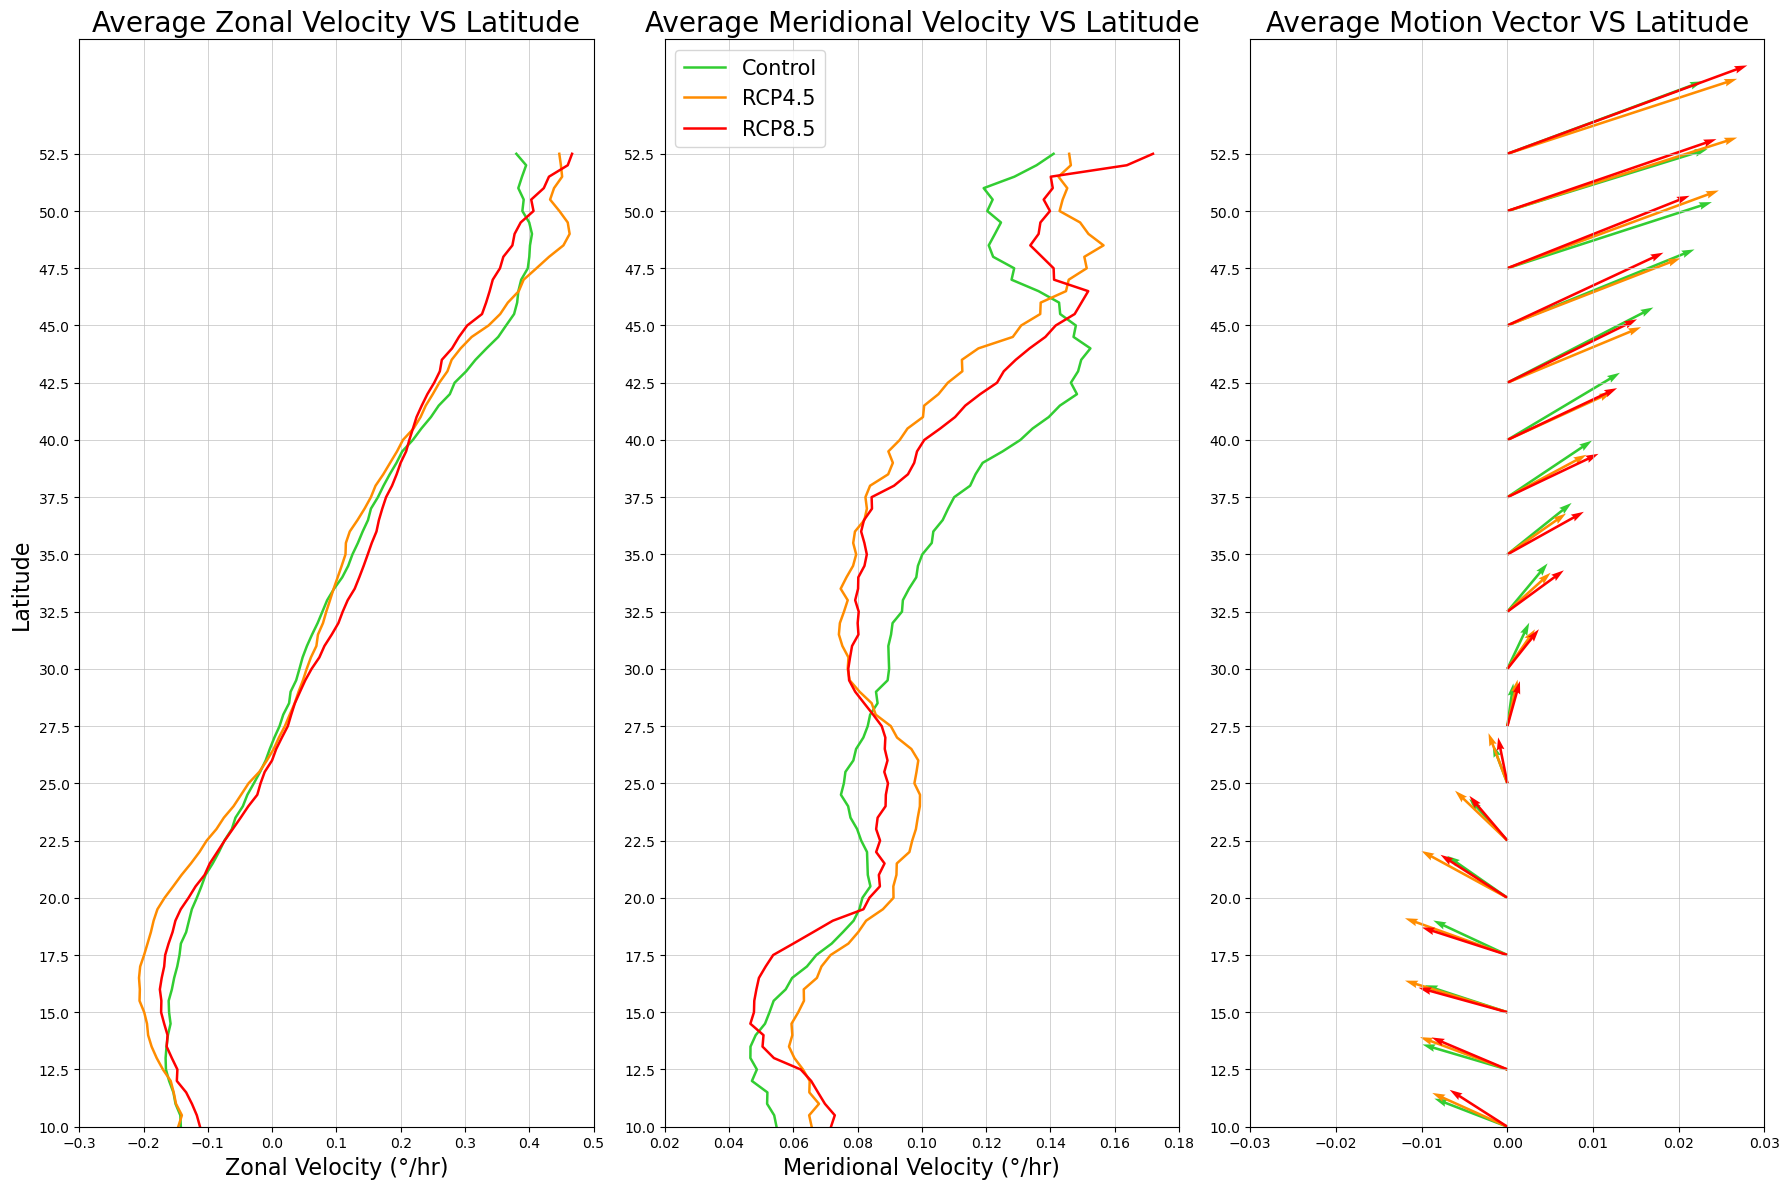

In [66]:
# Create Figure
Fig = pyplot.figure(figsize=(18,12))
#
# Plot Zonal Velocity
Ax1 = Fig.add_subplot(1,3,1)
Plot_Lon_Velo(Ax1, Velo_DF)
#
# Plot Meridional Velocity
Ax2 = Fig.add_subplot(1,3,2)
Plot_Lat_Velo(Ax2, Velo_DF)
#
# Plot Vectors
Ax3 = Fig.add_subplot(1,3,3)
Plot_Vectors(Ax3, Velo_DF_2)
#
# Savefig
pyplot.tight_layout()
Fig.savefig(Output_Diri+'Motion_Vectors.png', bbox_inches='tight')